<a href="https://colab.research.google.com/github/Nendyy/Diabetes_readmission/blob/main/Data_wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## INTRODUCTION

Diabetes mellitus is a chronic metabolic disorder characterized by persistent hyperglycemia, which arises due to defects in insulin secretion, insulin action, or both. It is a major public health concern globally, with an increasing incidence and prevalence. The management of diabetes often requires continuous monitoring and medical intervention, making it essential to identify patients at risk of complications and readmissions.

Hospital readmissions are a significant issue in the management of chronic diseases like diabetes. Readmission rates can serve as an indicator of the quality of care and patient management. High readmission rates often reflect gaps in the continuum of care, inadequate management of the disease, or complications arising from poorly controlled diabetes. Reducing readmissions not only improves patient outcomes but also reduces healthcare costs and optimizes resource utilization.

The primary objective of this project is to develop a machine learning model to predict readmission rates among diabetes patients. By analyzing patient data and identifying key factors associated with readmissions, the model aims to provide actionable insights that can help healthcare providers intervene early and manage patients more effectively. The project involves several key steps, including data preprocessing, feature selection, model development, and evaluation.

The dataset used for this project includes detailed information on diabetes patients, including demographic details, medical history, treatment procedures, and hospital admission data. Key features in the dataset include age, number of lab procedures, number of medications, and admission type, among others, which will be used to build a preictive model.

By predicting readmission risks, healthcare providers can better allocate resources, design targeted intervention strategies, and improve patient management practices. This project aims to contribute to the ongoing efforts to enhance chronic disease management and improve healthcare outcomes through data-driven decision-making. The insights gained from this model can help in devising preventive measures, optimizing treatment plans, and ultimately improving the quality of care for diabetes patients.

## Dataset description

- Collected from 130 hospitals in the U.S. during 10 years(1999-2008)
- Contains 101,766 observations and 50 features
- Description and values of the features can be found in this [research article](https://onlinelibrary.wiley.com/doi/10.1155/2014/781670)
- Dataset can be downloaded [here](https://onlinelibrary.wiley.com/action/downloadSupplement?doi=10.1155%2F2014%2F781670&file=bmri781670-sup-0001-f1.zip)

**Variable Description**

- Encounter ID: Unique identifier of an encounter

- Patient number: Unique identifier of a patient

- Race Values: Caucasian, Asian, African American, Hispanic, and other

- Gender Values: male, female, and unknown/invalid

- Age: Grouped in 10-year intervals: 0, 10), 10, 20), …, 90, 100)

- Weight: Weight in pounds

- Admission type: Integer identifier corresponding to 9 distinct values, for example, emergency, urgent, elective, newborn, and not available

- Discharge disposition: Integer identifier corresponding to 29 distinct values, for example, discharged to home, expired, and not available

- Admission source: Integer identifier corresponding to 21 distinct values, for example, physician referral, emergency room, and transfer from a hospital

- Time in hospital: Integer number of days between admission and discharge

- Payer code : Integer identifier corresponding to 23 distinct values, for example, Blue Cross/Blue Shield, Medicare, and self-pay Medical

- Medical specialty: Integer identifier of a specialty of the admitting physician, corresponding to 84 distinct values, for example, cardiology, internal medicine, family/general practice, and surgeon

- Number of lab procedures: Number of lab tests performed during the encounter

- Number of procedures: Numeric Number of procedures (other than lab tests) performed during the encounter

- Number of medications: Number of distinct generic names administered during the encounter

- Number of outpatient visits: Number of outpatient visits of the patient in the year preceding the encounter

- Number of emergency visits: Number of emergency visits of the patient in the year preceding the encounter

- Number of inpatient visits: Number of inpatient visits of the patient in the year preceding the encounter

- Diagnosis 1: The primary diagnosis (coded as first three digits of ICD9); 848 distinct values

- Diagnosis 2: Secondary diagnosis (coded as first three digits of ICD9); 923 distinct values

- Diagnosis 3: Additional secondary diagnosis (coded as first three digits of ICD9); 954 distinct values

- Number of diagnoses : Number of diagnoses entered to the system 0%

- Glucose serum test : result Indicates the range of the result or if the test was not taken. Values: “>200,” “>300,” “normal,” and “none” if not measured

- A1c test result : Indicates the range of the result or if the test was not taken. Values: “>8” if the result was greater than 8%, “>7” if the result was greater than 7% but less than 8%, “normal” if the result was less than 7%, and “none” if not measured.

- Change of medications : Indicates if there was a change in diabetic medications (either dosage or generic name). Values: “change” and “no change”

- Diabetes medications : Indicates if there was any diabetic medication prescribed. Values: “yes” and “no” 24 features for medications For the generic names: metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride- pioglitazone, metformin-rosiglitazone, and metformin- pioglitazone, the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed

- Readmitted: Days to inpatient readmission. Values: “<30” if the patient was readmitted in less than 30 days, “>30” if the patient was readmitted in more than 30 days, and “No” for no record of readmission

In [ ]:
!pip install mplcyberpunk

In [4]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mplcyberpunk
import warnings

plt.style.use("cyberpunk")

# Ignore all warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
path = "/content/drive/MyDrive/Colab Notebooks/diabetic_data.csv"
data = pd.read_csv(path)
print(data.shape)
data.head()

(101766, 50)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [7]:
path = "/content/drive/MyDrive/Colab Notebooks/IDs_mapping.csv"
data_dict = pd.read_csv(path)
data_dict.head()

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available


In [8]:
print("\nData Types and Non-Null Counts:")
data.info()


Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            

In [9]:
# make a copy of the dataset before cleanin and preprocessing
df = data.copy()

In [10]:
df = df.drop_duplicates(subset='patient_nbr', keep='first')
print(df.shape)

(71518, 50)


In [11]:
# rename some columns
df = df.rename(columns={
    'admission_type_id': 'admission_type',
    'discharge_disposition_id': 'discharge_disposition',
    'admission_source_id': 'admission_source',
    'patient_nbr': 'patient_id',
    'diag_1': 'primary_diagnosis',
    'A1Cresult': 'HbA1c'
})

In [12]:
# converting some columns to categorical columns
cat_cols = ['admission_type', 'discharge_disposition', 'admission_source']
df[cat_cols] = df[cat_cols].astype('category')

> During exploration, I observed that there were no missing values. However, '?' was used as a placeholder for missing values/NAN values. Next, I'll identify columns that contain '?' and handle them.

In [13]:
# Identify columns containing '?'
columns_with_question_mark = []

for column in df.columns:
    if df[column].astype(str).str.contains('\?').any():  # Check if '?' is in any row of the column
        columns_with_question_mark.append(column)

# Display the columns with '?'
print("Columns containing '?':", columns_with_question_mark)

Columns containing '?': ['race', 'weight', 'payer_code', 'medical_specialty', 'primary_diagnosis', 'diag_2', 'diag_3']


In [14]:
df['weight'].value_counts()

,count
weight,
?,68665
[75-100),1195
[50-75),781
[100-125),566
[125-150),131
[25-50),89
[0-25),46
[150-175),33
[175-200),9


In [15]:
df['race'].value_counts()

,count
race,
Caucasian,53491
AfricanAmerican,12887
?,1948
Hispanic,1517
Other,1178
Asian,497


In [16]:
df['medical_specialty'].value_counts()

,count
medical_specialty,
?,34477
InternalMedicine,10919
Family/GeneralPractice,5118
Emergency/Trauma,4465
Cardiology,4266
...,...
SportsMedicine,1
Dermatology,1
Proctology,1


In [17]:
df['payer_code'].value_counts()

,count
payer_code,
?,31043
MC,20414
HM,4022
BC,3432
SP,3347
MD,2197
CP,1986
UN,1879
CM,1334


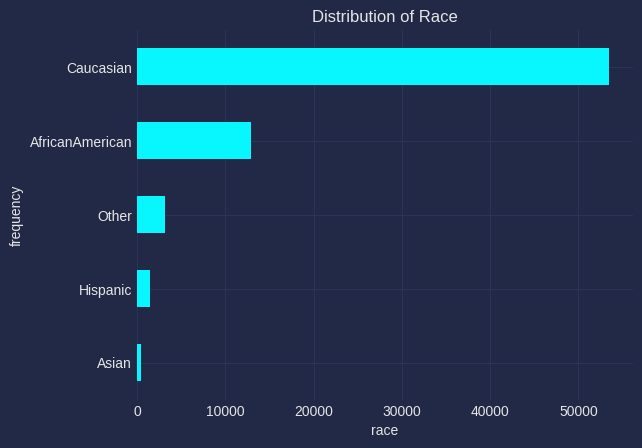

In [18]:
# Replace '?' with 'Other' in the 'race' column
df['race'] = df['race'].replace('?', 'Other')

# make a barchart to show distribution
(df['race'].value_counts()
.sort_values(ascending=True)
.plot(kind = 'barh'))

# label the axes
plt.xlabel('race')
plt.ylabel('frequency')
plt.title('Distribution of Race');

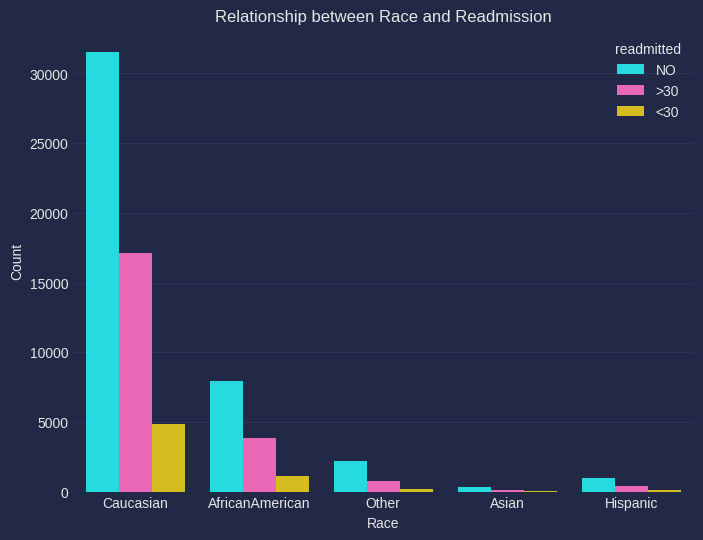

In [19]:
#Relationship between race and readmitted
plt.figure(figsize=(8, 6))
sns.countplot(x='race', hue='readmitted', data=df)
plt.title('Relationship between Race and Readmission')
plt.xlabel('Race')
plt.ylabel('Count');

### Dropping some columns
- encounter_id so we can focus only on patient_id.
- weight, payer_code and medical_specialty because of high percentage of missing values.
- drop diag_2 and diag_3, and keep only diag_1; the primary diagnosis.

In [20]:
# drop some unnecessary columns
cols = ['encounter_id', 'weight', 'payer_code', 'medical_specialty', 'diag_2', 'diag_3']
df.drop(columns = cols, inplace = True)

In [21]:
# drop rows containing '?' in the 'primary_diagnosis' column

# Replace '?' with NaN in the 'primary_diagnosis' column
df['primary_diagnosis'] = df['primary_diagnosis'].replace('?', np.nan)

# Drop rows where 'column_name' has NaN values
df = df.dropna(subset=['primary_diagnosis'])
df.shape

(71507, 44)

In [22]:
df.head()

,patient_id,race,gender,age,admission_type,discharge_disposition,admission_source,time_in_hospital,num_lab_procedures,num_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,8222157,Caucasian,Female,[0-10),6,25,1,1,41,0,...,No,No,No,No,No,No,No,No,No,NO
1,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,...,No,No,No,No,No,No,No,No,Yes,NO
3,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [23]:
df['gender'].value_counts()

,count
gender,
Female,38023
Male,33481
Unknown/Invalid,3


In [24]:
## drop rows containing 'Unknown/Invalid' in the 'gender' column

# Replace 'Unknown/Invalid' with NaN in the 'gender' column
df['gender'] = df['gender'].replace('Unknown/Invalid', np.nan)

# Drop rows where 'column_name' has NaN values
df = df.dropna(subset=['gender'])
df.shape

(71504, 44)

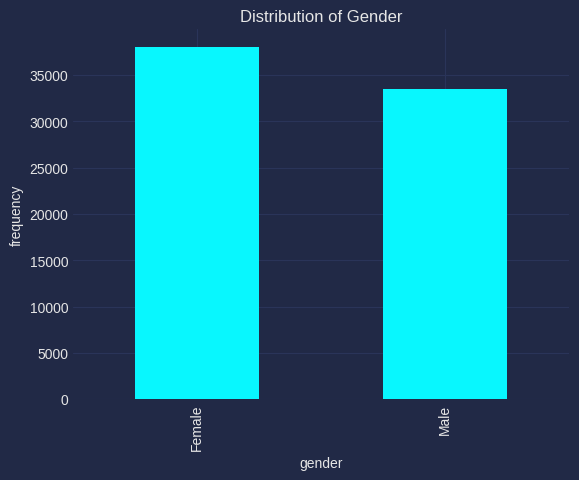

In [25]:
# make a barchart to show distribution
(df['gender'].value_counts()
.plot(kind = 'bar'))

# label the axes
plt.xlabel('gender')
plt.ylabel('frequency')
plt.title('Distribution of Gender');

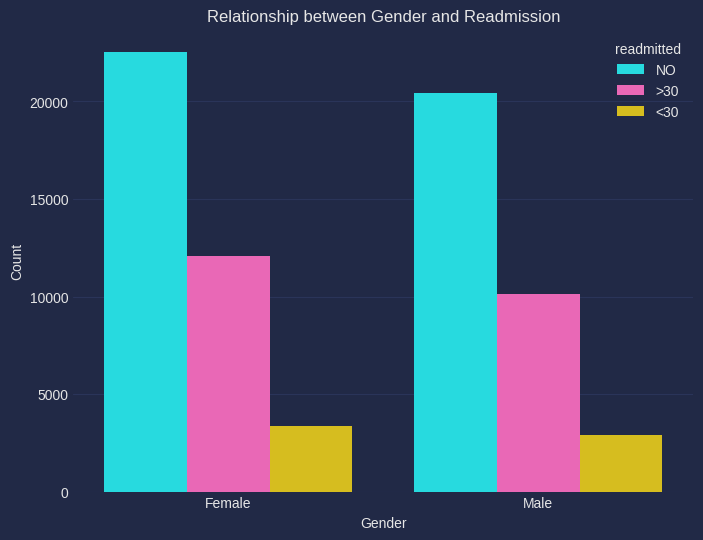

In [26]:
#Relationship between race and readmitted
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='readmitted', data=df)
plt.title('Relationship between Gender and Readmission')
plt.xlabel('Gender')
plt.ylabel('Count');

## 'Admission_type' column tells us under what condition a patient was admitted in. It has 8 distinct values which correspond to distinct descriptions. I am going to recode and collapse some of the values.

- **admission_type_id description:**
  - 1 = Emergency
  - 2 = Urgent
  - 3 = Elective
  - 4 = Newborn
  - 5 = Not Available
  - 6 = NULL
  - 7 = Trauma Center
  - 8 = Not Mapped

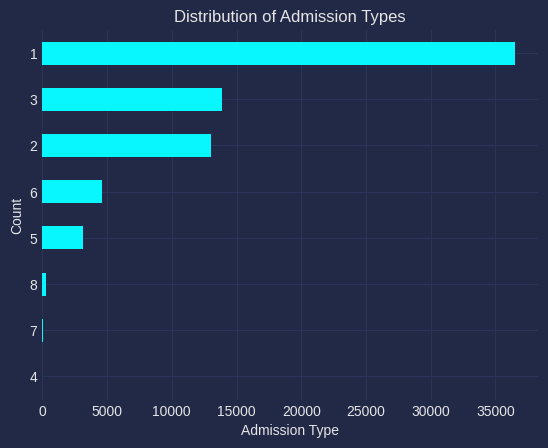

In [27]:
# make a barchart showing the distribution of the variables in the admission_type column

df['admission_type'].value_counts().sort_values(
    ascending=True).plot(kind='barh')
plt.title('Distribution of Admission Types')
plt.xlabel('Admission Type')
plt.ylabel('Count');

In [28]:
#collapse the variables of the admission_type column
df['admission_type'] = df['admission_type'].replace(2, 1) #collapse urgent to emergency
df['admission_type'] = df['admission_type'].replace(7, 1) #collapse trauma center to emergency
df['admission_type'] = df['admission_type'].replace(6, 5) #collapse null to not available
df['admission_type'] = df['admission_type'].replace(8, 5) #collapse not mapped to not available

In [29]:
#recode the variables in the admission_type column
df['admission_type'] = df['admission_type'].replace(1, 'Emergency')
df['admission_type'] = df['admission_type'].replace(3, 'Elective')
df['admission_type'] = df['admission_type'].replace([4, 5], 'Other')

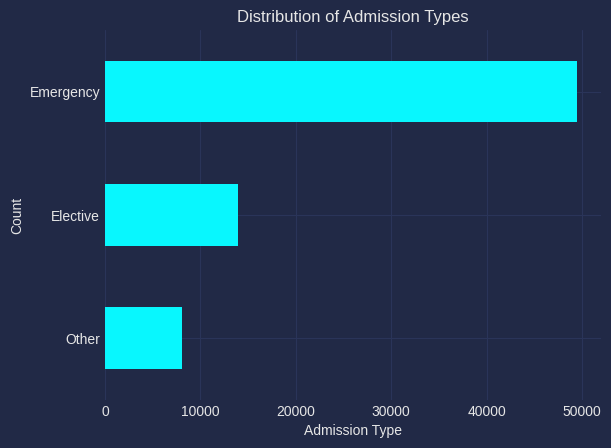

In [30]:
# make a barchart showing the distribution of the admission_type column after collapsing and recoding
df['admission_type'].value_counts().sort_values(
    ascending=True).plot(kind='barh')
plt.title('Distribution of Admission Types')
plt.xlabel('Admission Type')
plt.ylabel('Count');

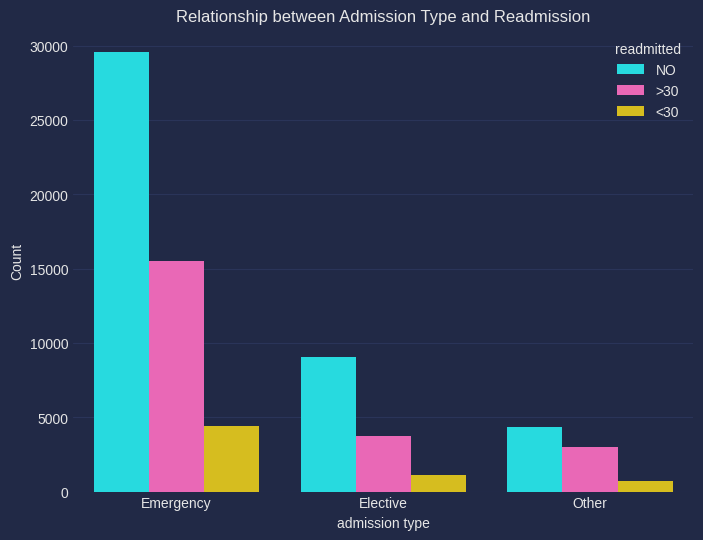

In [31]:
#Relationship between admission type and readmission
plt.figure(figsize=(8, 6))
sns.countplot(x='admission_type', hue='readmitted', data=df)
plt.title('Relationship between Admission Type and Readmission')
plt.xlabel('admission type')
plt.ylabel('Count');

## 'Admission_source' column tells us the source of the patient's admission. Here are the distinct values and their descriptions:

- **admission_source_id description:**
  - 1 = Physician Referral
  - 2 = Clinic Referral
  - 3 = HMO Referral
  - 4 = Transfer from a hospital
  - 5 = Transfer from a Skilled Nursing Facility (SNF)
  - 6 = Transfer from another health care facility
  - 7 = Emergency Room
  - 8 = Court/Law Enforcement
  - 9 = Not Available
  - 10 = Transfer from critical access hospital
  - 11 = Normal Delivery
  - 12 = Premature Delivery
  - 13 = Sick Baby
  - 14 = Extramural Birth
  - 15 = Not Available
  - 17 = NULL
  - 18 = Transfer From Another Home Health Agency
  - 19 = Readmission to Same Home Health Agency
  - 20 = Not Mapped
  - 21 = Unknown/Invalid
  - 22 = Transfer from hospital inpatient/same facility resulting in a separate claim
  - 23 = Born inside this hospital
  - 24 = Born outside this hospital
  - 25 = Transfer from Ambulatory Surgery Center
  - 26 = Transfer from Hospice

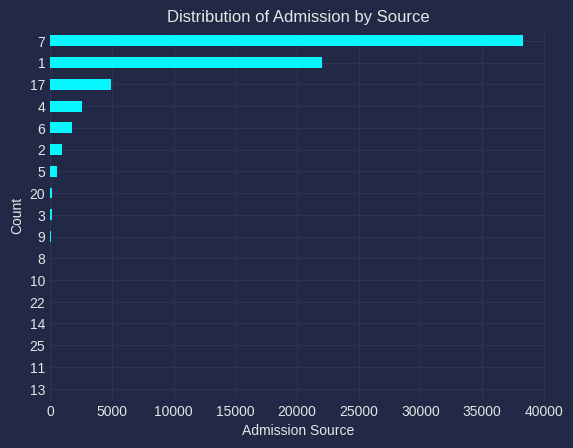

In [32]:
# make a barchart showing the distribution of the variables in the admission_source column

df['admission_source'].value_counts().sort_values(
    ascending=True).plot(kind='barh')
plt.title('Distribution of Admission by Source')
plt.xlabel('Admission Source')
plt.ylabel('Count');

In [33]:
#recode the variables in the admission_type column
df['admission_source'] = df['admission_source'].replace([1, 2, 3], 'Physician referral')
df['admission_source'] = df['admission_source'].replace([7,8], 'Emergency room')
df['admission_source'] = df['admission_source'].replace([4, 5, 6, 9, 10, 11, 12, 13, 14, 15, 17, 18,
                                                         19, 20, 21, 22, 23, 24,  25, 26], 'Other')

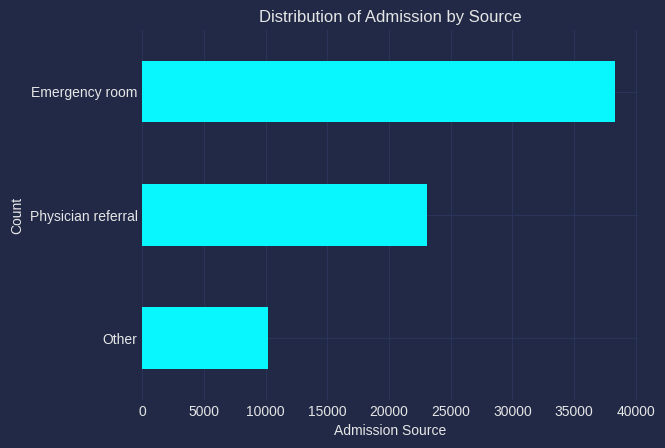

In [34]:
# make a barchart showing the distribution of the admission_sourcee column after recoding
df['admission_source'].value_counts().sort_values(
    ascending=True).plot(kind='barh')
plt.title('Distribution of Admission by Source')
plt.xlabel('Admission Source')
plt.ylabel('Count');

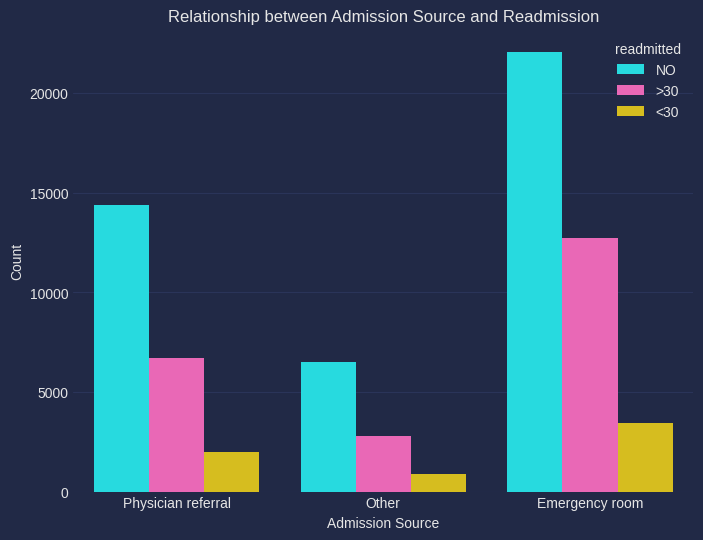

In [35]:
#Relationship between admission source and readmission
plt.figure(figsize=(8, 6))
sns.countplot(x='admission_source', hue='readmitted', data=df)
plt.title('Relationship between Admission Source and Readmission')
plt.xlabel('Admission Source')
plt.ylabel('Count');

## 'Discharge_disposition' column tells us under what condition a patient was discharged. It has 30 distinct values which correspond to distinct descriptions. As with the `admission_type` column, I am going to recode and collapse some of the variables.

- **discharge_disposition_id description:**
  - 1 = Discharged to home
  - 2 = Discharged/transferred to another short-term hospital
  - 3 = Discharged/transferred to SNF
  - 4 = Discharged/transferred to ICF
  - 5 = Discharged/transferred to another type of inpatient care institution
  - 6 = Discharged/transferred to home with home health service
  - 7 = Left AMA
  - 8 = Discharged/transferred to home under care of Home IV provider
  - 9 = Admitted as an inpatient to this hospital
  - 10 = Neonate discharged to another hospital for neonatal aftercare
  - 11 = Expired
  - 12 = Still patient or expected to return for outpatient services
  - 13 = Hospice / home
  - 14 = Hospice / medical facility
  - 15 = Discharged/transferred within this institution to Medicare approved swing bed
  - 16 = Discharged/transferred/referred to another institution for outpatient services
  - 17 = Discharged/transferred/referred to this institution for outpatient services
  - 18 = NULL
  - 19 = Expired at home. Medicaid only, hospice.
  - 20 = Expired in a medical facility. Medicaid only, hospice.
  - 21 = Expired, place unknown. Medicaid only, hospice.
  - 22 = Discharged/transferred to another rehab facility including rehab units of a hospital.
  - 23 = Discharged/transferred to a long-term care hospital.
  - 24 = Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare.
  - 25 = Not Mapped
  - 26 = Unknown/Invalid
  - 27 = Discharged/transferred to a federal health care facility.
  - 28 = Discharged/transferred/referred to a psychiatric hospital or psychiatric distinct part unit of a hospital
  - 29 = Discharged/transferred to a Critical Access Hospital (CAH)
  - 30 = Discharged/transferred to another type of health care institution not defined elsewhere

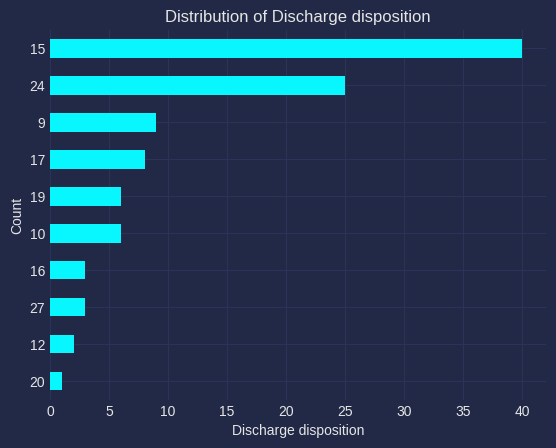

In [36]:
df['discharge_disposition'].value_counts().sort_values(
    ascending=True).head(10).plot(kind='barh')
plt.title('Distribution of Discharge disposition')
plt.xlabel('Discharge disposition')
plt.ylabel('Count');

### drop columns 11, 13, 14, 19, 20, 21 because the patients died or were moved to hospice care


In [37]:
# List of discharge_disposition_id values indicating death or hospice care
values_to_drop = [11, 13, 14, 19, 20, 21]

# Drop rows where discharge_disposition_id matches the specified values
df = df[~df['discharge_disposition'].isin(values_to_drop)]

# clean up the unused categories
df['discharge_disposition'] = df['discharge_disposition'].cat.remove_unused_categories()

# Verify that they were dropped
print(df.shape)
print(df['discharge_disposition'].unique())

(69960, 44)
[25, 1, 3, 6, 2, ..., 9, 15, 28, 24, 27]
Length: 21
Categories (21, int64): [1, 2, 3, 4, ..., 24, 25, 27, 28]


In [38]:
# recode the variables to distinct groups
df['discharge_disposition'] = df['discharge_disposition'].replace([1, 6, 8], 'Home')
df['discharge_disposition'] = (df['discharge_disposition']
                               .replace([2, 3, 4, 5, 15, 16, 17, 22, 23, 24, 27, 28, 29, 30], 'Transfer to another facility'))
df['discharge_disposition'] = (df['discharge_disposition']
                               .replace([7, 9, 10, 12, 18, 25, 26], 'Other'))

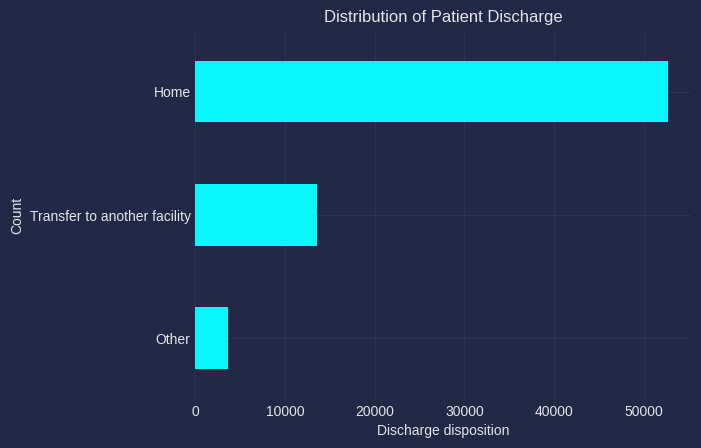

In [39]:
# make a barchart showing the distribution of the discharge_disposition column after recoding
df['discharge_disposition'].value_counts().sort_values(
    ascending=True).plot(kind='barh')
plt.title('Distribution of Patient Discharge')
plt.xlabel('Discharge disposition')
plt.ylabel('Count');

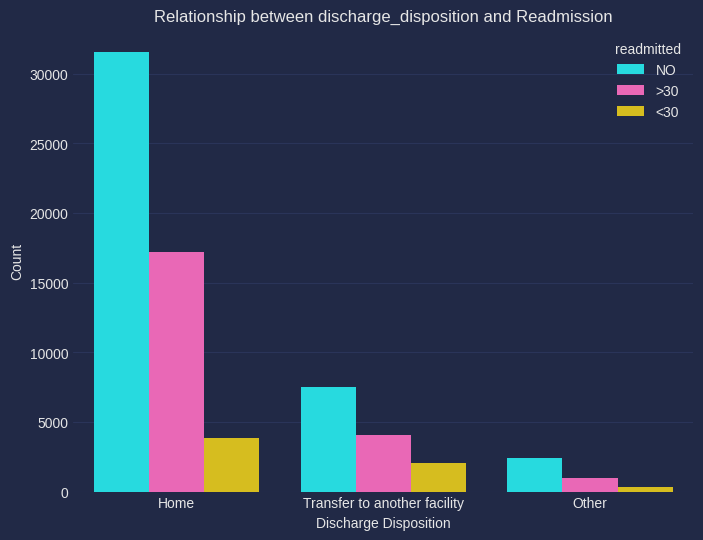

In [40]:
#Relationship between discharge_disposition and readmission
plt.figure(figsize=(8, 6))
sns.countplot(x='discharge_disposition', hue='readmitted', data=df)
plt.title('Relationship between discharge_disposition and Readmission')
plt.xlabel('Discharge Disposition')
plt.ylabel('Count');

In [41]:
df['primary_diagnosis'].nunique()

694

## Categorization of the primary_diagnosis column
In the primary_diagnosis column, I tried to group the numerous unique ICD codes in the column into broader, clinically relevant disease categories. Given that the dprimary_diagnosis contained a wide range of ICD codes (about 694 unique values), a direct interpretation was impractical. To address this, I implemented categorisation based on the codes below:

  - circulatory for icd9: 390–459, 785
  - Digestive for icd9: 520–579, 787
  - Genitourinary for icd9: 580–629, 788
  - Diabetes for icd9: 250.xx
  - Injury for icd9: 800–999
  - Musculoskeletal for icd9: 710–739
  - Neoplasms for icd9: 140–239
  - Respiratory for icd9: 460–519, 786.

In [42]:
# Function to categorize primary_diagnosis column
def categorize_diagnosis(code):
    if code.startswith('V') or code.startswith('E'):
        return 'Other'
    elif code.startswith('250'):
        return 'Diabetes'
    elif (code.isdigit() and 390 <= int(code) <= 459) or code == '785':
        return 'Circulatory'
    elif (code.isdigit() and 460 <= int(code) <= 519) or code == '786':
        return 'Respiratory'
    elif (code.isdigit() and 520 <= int(code) <= 579) or code == '787':
        return 'Digestive'
    elif (code.isdigit() and 580 <= int(code) <= 629) or code == '788':
        return 'Genitourinary'
    elif code.isdigit() and 140 <= int(code) <= 239:
        return 'Neoplasms'
    elif code.isdigit() and 710 <= int(code) <= 739:
        return 'Musculoskeletal'
    elif code.isdigit() and 800 <= int(code) <= 999:
        return 'Injury'
    else:
        return 'Other'

# Apply the function to create the primary_diagnosis column
df['primary_diagnosis'] = df['primary_diagnosis'].apply(categorize_diagnosis)

# convert 'primary_diagnosis' column to categorical column
df['primary_diagnosis'] = df['primary_diagnosis'].astype('category')

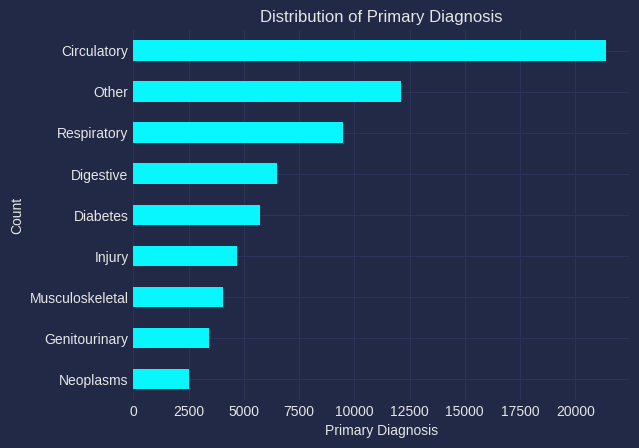

In [43]:
# make a barchart showing the distribution of the primary_diagnosis column after categorisation
df['primary_diagnosis'].value_counts().sort_values(
    ascending=True).plot(kind='barh')
plt.title('Distribution of Primary Diagnosis')
plt.xlabel('Primary Diagnosis')
plt.ylabel('Count');

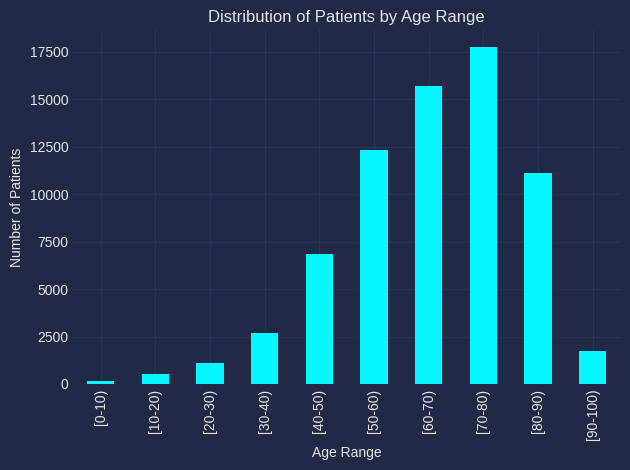

In [44]:
df['age'].value_counts().sort_index().plot(kind='bar')

# labeling the plot
plt.xlabel('Age Range')
plt.ylabel('Number of Patients')
plt.title('Distribution of Patients by Age Range')
plt.tight_layout();

In [45]:
# re-categorizing the age column

# Define conditions for the age groups
conditions = [
    df['age'].isin(["[0-10)", "[10-20)", "[20-30)", "[30-40)"]),
    df['age'].isin(["[40-50)"]),
    df['age'].isin(["[50-60)"]),
    df['age'].isin(["[60-70)"]),
    df['age'].isin(["[70-80)"]),
    df['age'].isin(["[80-90)", "[90-100)"])
]

# Define the corresponding labels for the new age groups
age_groups = [
    "[0-40]",
    "[40-50]",
    "[50-60]",
    "[60-70]",
    "[70-80]",
    "[80-100]"
]

# Recategorize the age column
df['age'] = np.select(conditions, age_groups, default="[70-80]")

# convert age column to categoricalcolumn
df['age'] = df['age'].astype('category')

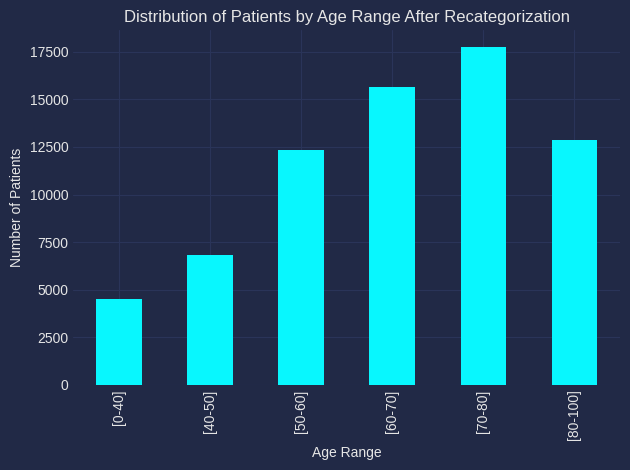

In [46]:
# distribution of age groups after recategorization
df['age'].value_counts().sort_index().plot(kind='bar')

# labeling the plot
plt.xlabel('Age Range')
plt.ylabel('Number of Patients')
plt.title('Distribution of Patients by Age Range After Recategorization')
plt.tight_layout();

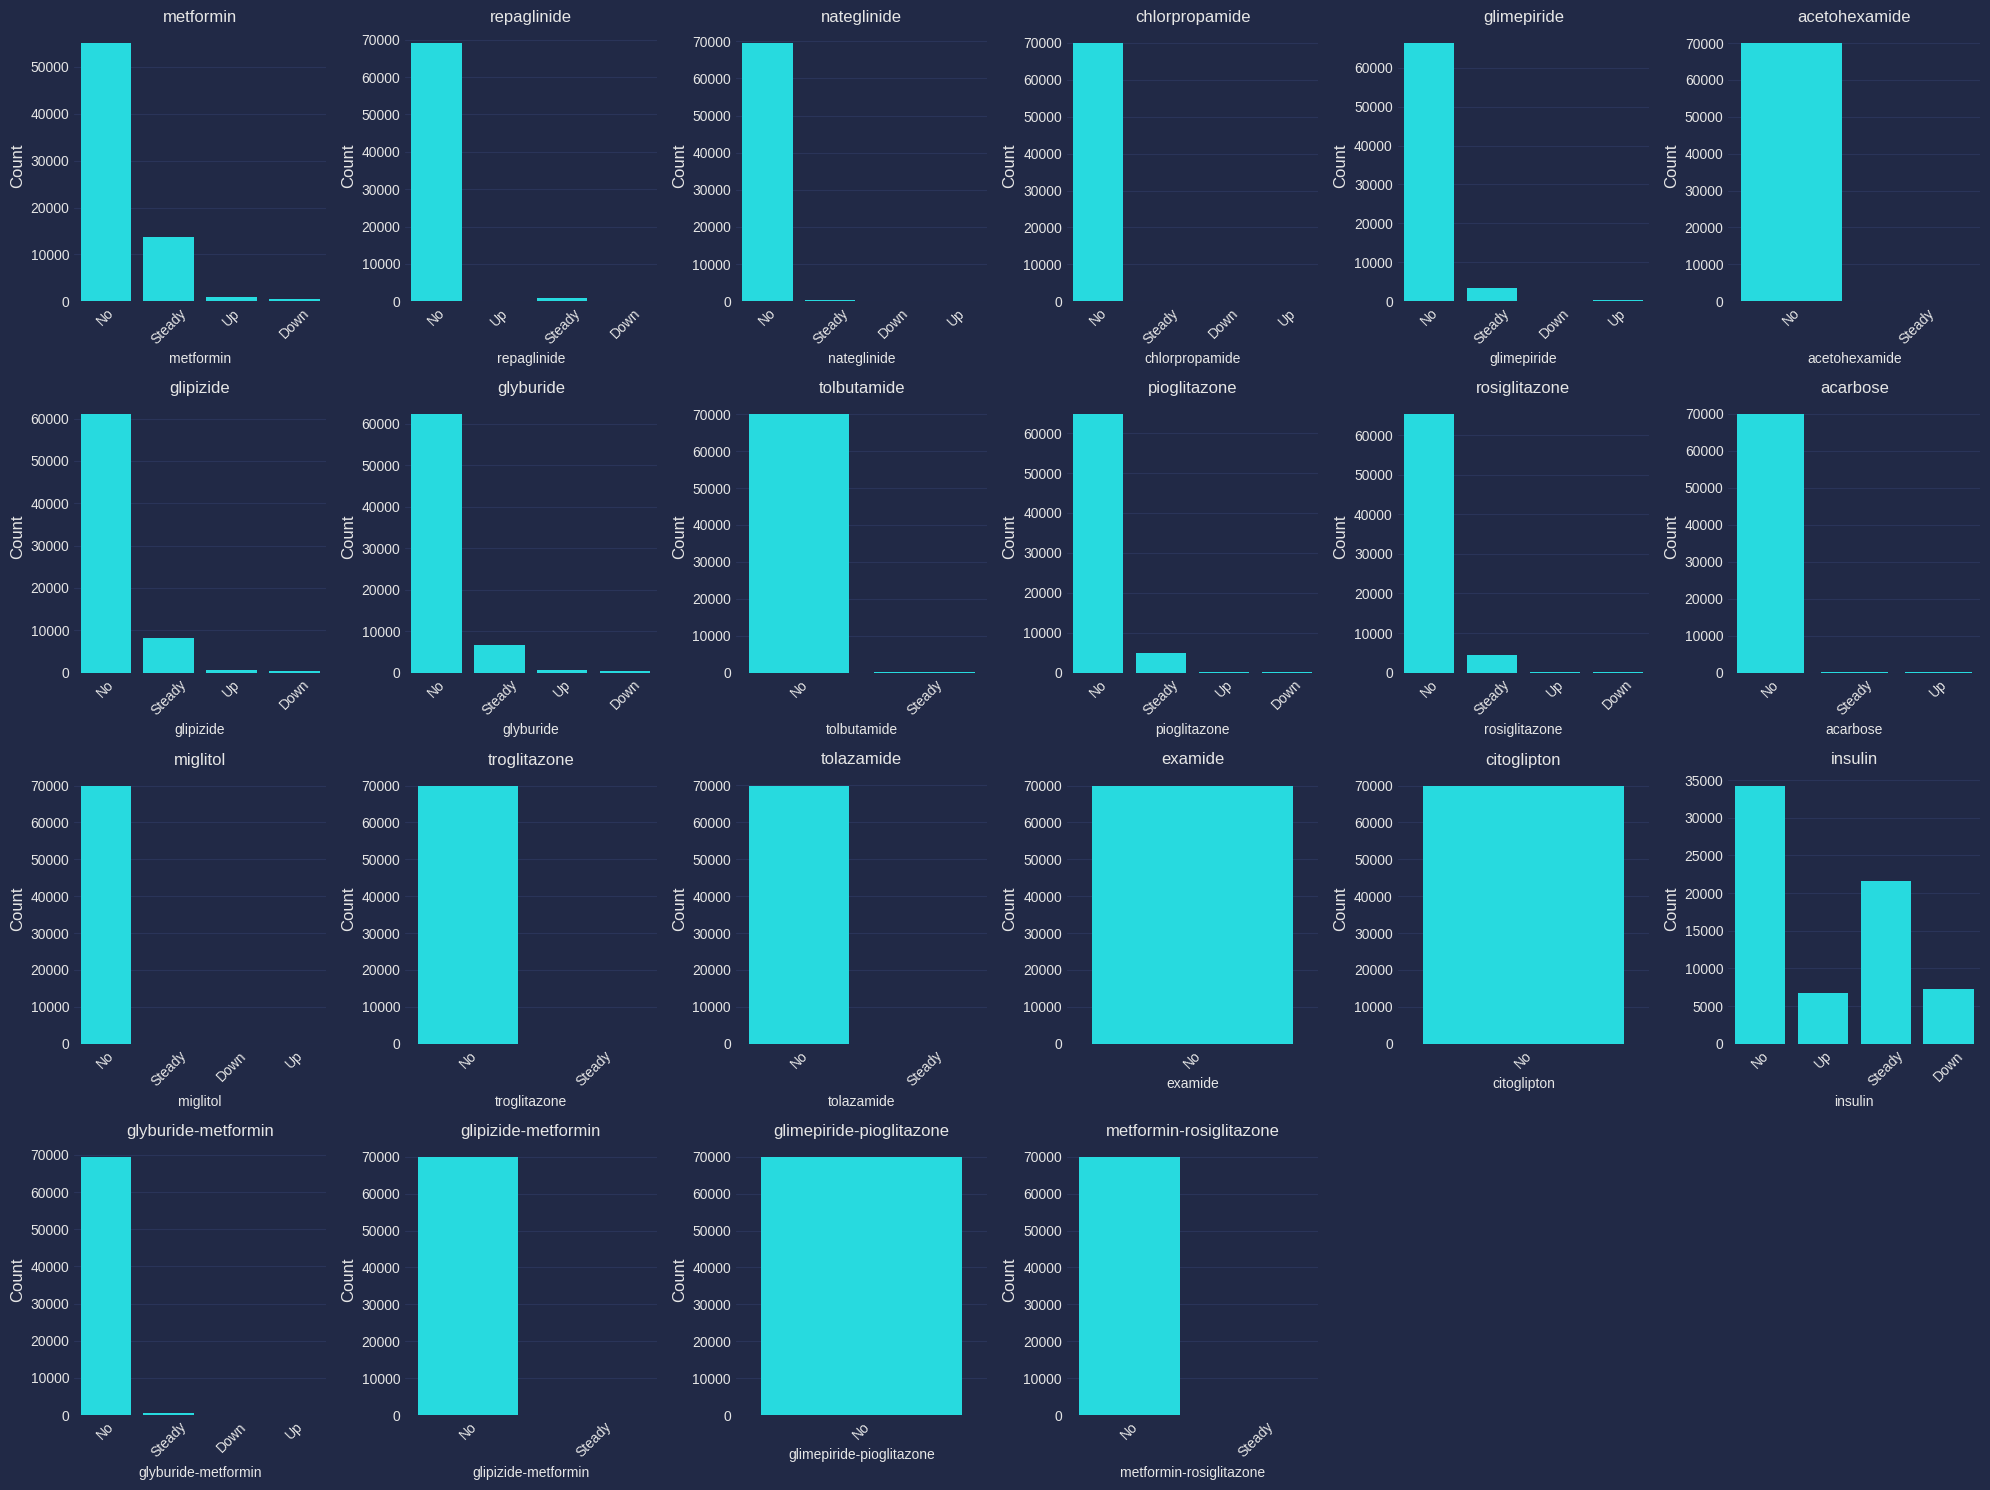

In [47]:
# Listing the medication columns
medication_columns = df.iloc[:,18:40].columns

# Define the number of rows and columns for the plot grid
rows = 4
cols = 6
fig, axes = plt.subplots(rows, cols, figsize=(20, 15))
axes = axes.flatten()

# Iterate over each medication column and plot
for idx, col in enumerate(medication_columns):
    sns.countplot(x=col, data=df, ax=axes[idx])
    axes[idx].set_title(col)
    axes[idx].set_ylabel('Count', size=12)
    axes[idx].tick_params(axis='x', rotation=45, labelsize=10)

# Hide any unused subplots
for ax in axes[len(medication_columns):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

From the plots above, it is evident that most medications were not commonly administered to patients. However, insulin, metformin, glipizide, glyburide, pioglitazone, and rosiglitazone are the frequently prescribed medications. Therefore, we will retain these medications and drop the others.

In [48]:
# Drop the specified medication columns
df = df.drop(columns=[
    'examide',
    'citoglipton',
    'glimepiride',
    'repaglinide',
    'nateglinide',
    'chlorpropamide',
    'acetohexamide',
    'tolbutamide',
    'acarbose',
    'miglitol',
    'troglitazone',
    'tolazamide',
    'glyburide-metformin',
    'glipizide-metformin',
    'glimepiride-pioglitazone',
    'metformin-rosiglitazone',
    'metformin-pioglitazone'
])

df.shape

(69960, 27)

In [49]:
# Define a function to replace 'Up', 'Steady', 'Down' with 'Yes'
def replace_drug_values(value):
  if value in ['Up', 'Steady', 'Down']:
    return 'Yes'
  else:
    return value

# Apply the function to the drug columns
drug_columns = ['metformin', 'glyburide', 'glipizide', 'pioglitazone', 'rosiglitazone']
for column in drug_columns:
  df[column] = df[column].apply(replace_drug_values)

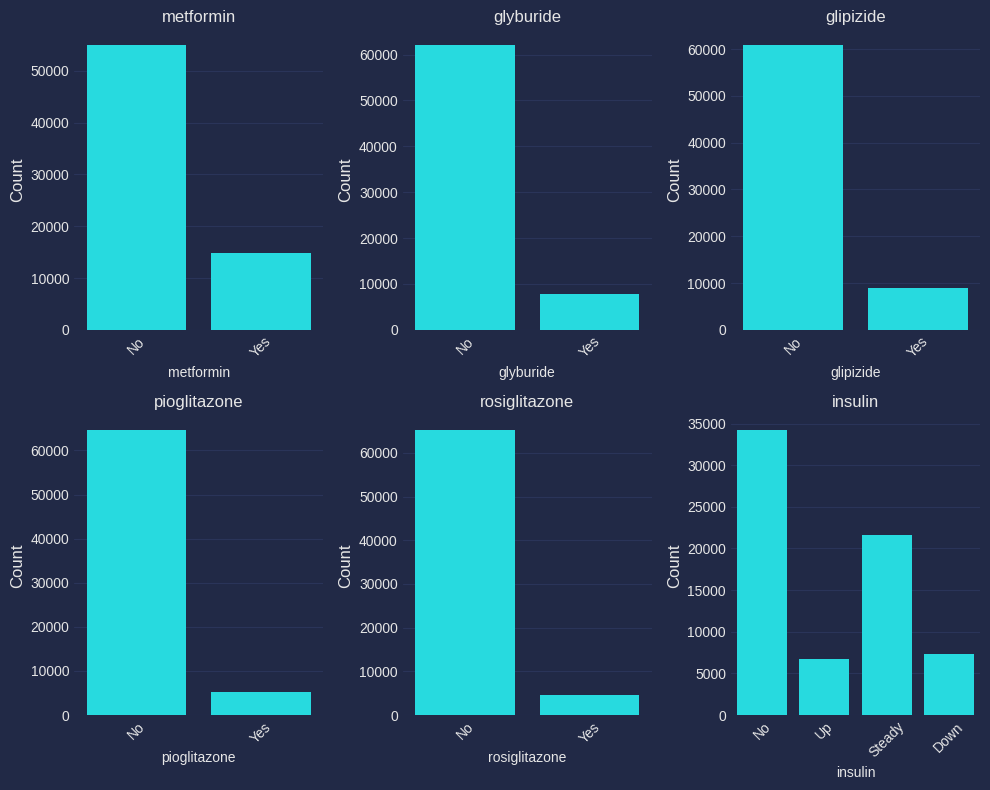

In [50]:
# Listing the medication columns
drugs = ['metformin', 'glyburide', 'glipizide',
                'pioglitazone', 'rosiglitazone', 'insulin']


# Define the number of rows and columns for the plot grid
rows = 2
cols = 3
fig, axes = plt.subplots(rows, cols, figsize=(10, 8))
axes = axes.flatten()

# Iterate over each medication column and plot
for idx, col in enumerate(drugs):
    sns.countplot(x=col, data=df, ax=axes[idx])
    axes[idx].set_title(col)
    axes[idx].set_ylabel('Count', size=12)
    axes[idx].tick_params(axis='x', rotation=45, labelsize=10)

# Hide any unused subplots
for ax in axes[len(drugs):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

In [51]:
for column in drug_columns:
  df[column] = df[column].replace({'No': 0, 'Yes': 1})

Next, we categorize readmitted column into 0 and 1.
- 0 = patient was not re-admitted or was re-admitted after 30 days.
- 1 = paient was re-admitted within 30 days.

In [52]:
# Recode the readmitted column
df['readmitted'] = df['readmitted'].replace({'>30': '0', 'NO': '0'})
df['readmitted'] = df['readmitted'].apply(lambda x: '1' if x not in ['0'] else '0')

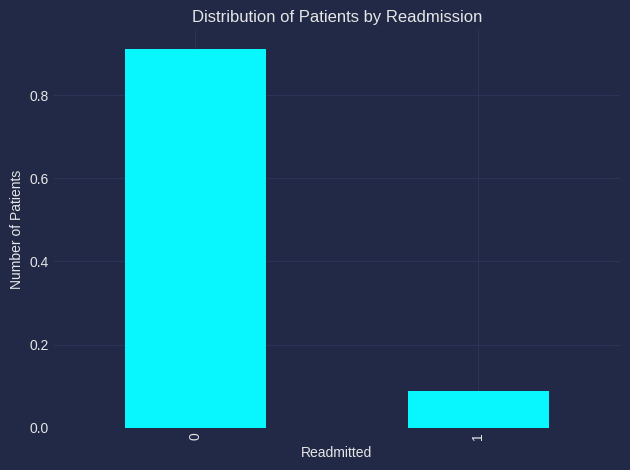

In [53]:
# distribution of readmitted column after recategorization
df['readmitted'].value_counts(normalize = True).plot(kind='bar')

# labeling the plot
plt.xlabel('Readmitted')
plt.ylabel('Number of Patients')
plt.title('Distribution of Patients by Readmission')
plt.tight_layout();

> from the plot, we can see that about 15% of patients were readmitted within 30 days after discharge.

In [54]:
# drop the 'patient_id' column
df = df.drop(columns=[
    'patient_id'
])

df.shape

(69960, 26)

Encoding some variables: The dataset used string values for gender, medication change  etc. To better fit those variables into the model, they would be interpreted to numeric binary variables to reflect their nature. For example, we encoded the “ medication change ” feature from “No” (no change) and “Ch” (changed) into 0 and 1.

In [55]:
df['change'] = df['change'].replace('Ch', 1)
df['change'] = df['change'].replace('No', 0)
df['gender'] = df['gender'].replace('Male', 1)
df['gender'] = df['gender'].replace('Female', 0)
df['diabetesMed'] = df['diabetesMed'].replace('Yes', 1)
df['diabetesMed'] = df['diabetesMed'].replace('No', 0)

Encoding HbA1c result and Glucose serum test result into categories of Normal, Abnormal and Not tested. With normal = 0, abnormal = 1, and not tested = -99

In [56]:
df['HbA1c'] = df['HbA1c'].replace('>7', 1)
df['HbA1c'] = df['HbA1c'].replace('>8', 1)
df['HbA1c'] = df['HbA1c'].replace('Norm', 0)
df['HbA1c'] = df['HbA1c'].fillna(-99)
df['max_glu_serum'] = df['max_glu_serum'].replace('>200', 1)
df['max_glu_serum'] = df['max_glu_serum'].replace('>300', 1)
df['max_glu_serum'] = df['max_glu_serum'].replace('Norm', 0)
df['max_glu_serum'] = df['max_glu_serum'].fillna(-99)

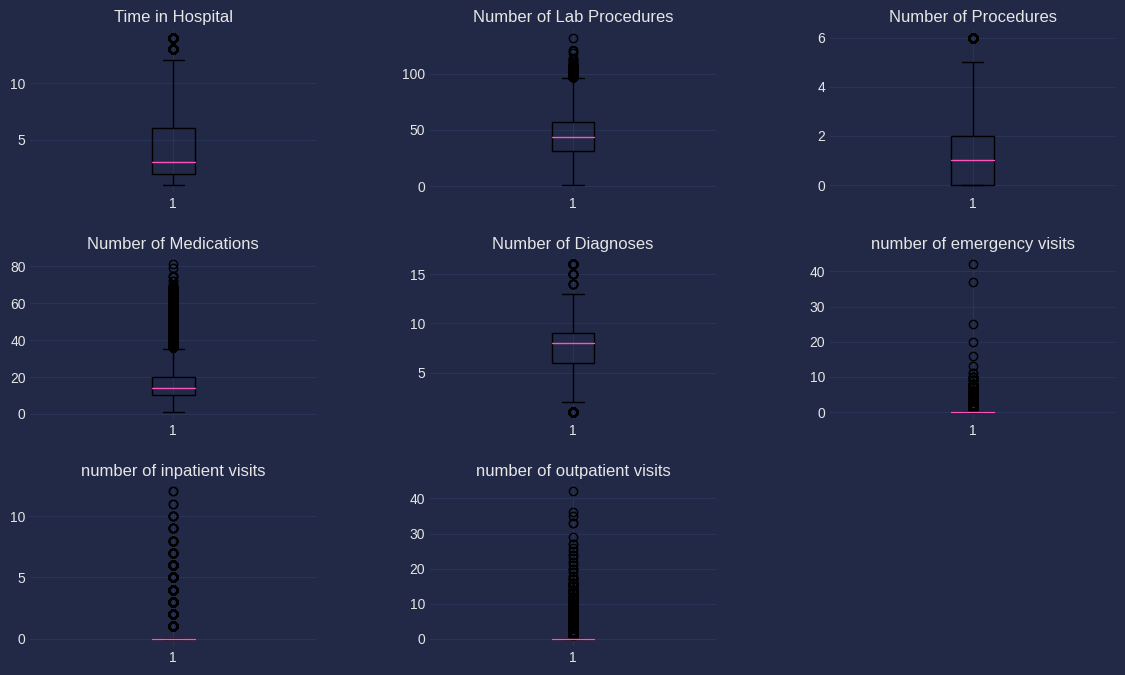

In [57]:
# check for outliers

# Setting up the plot grid
plt.figure(figsize=(14, 8))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# List of column names and titles for boxplots
num_columns = [
    ('time_in_hospital', 'Time in Hospital'),
    ('num_lab_procedures', 'Number of Lab Procedures'),
    ('num_procedures', 'Number of Procedures'),
    ('num_medications', 'Number of Medications'),
    ('number_diagnoses', 'Number of Diagnoses'),
    ('number_emergency','number of emergency visits'),
    ('number_inpatient', 'number of inpatient visits'),
    ('number_outpatient', 'number of outpatient visits')
]

# Create each boxplot
for i, (col, title) in enumerate(num_columns, 1):
    plt.subplot(3, 3, i)
    plt.boxplot(df[col].dropna())
    plt.title(title);

# Display the plots
plt.show()

> check for multi-collinearity between variables

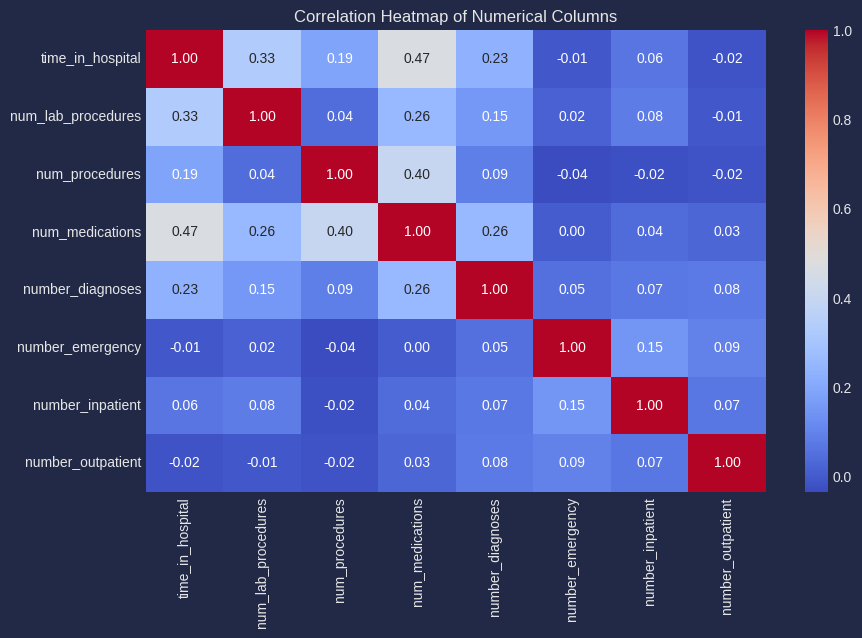

In [58]:
# Select the numerical columns
numeric_cols = ["time_in_hospital", "num_lab_procedures", "num_procedures",
                "num_medications", "number_diagnoses", "number_emergency",
               "number_inpatient", "number_outpatient"]

# Calculate the correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show();

> from the heatmap above, we can see there is no multi-collinearity among our variables.

In [59]:
df.isna().sum()

,0
race,0
gender,0
age,0
admission_type,0
discharge_disposition,0
admission_source,0
time_in_hospital,0
num_lab_procedures,0
num_procedures,0
num_medications,0


In [60]:
df.head().T

,0,1,2,3,4
race,Caucasian,Caucasian,AfricanAmerican,Caucasian,Caucasian
gender,0,0,0,1,1
age,[0-40],[0-40],[0-40],[0-40],[40-50]
admission_type,Other,Emergency,Emergency,Emergency,Emergency
discharge_disposition,Other,Home,Home,Home,Home
admission_source,Physician referral,Emergency room,Emergency room,Emergency room,Emergency room
time_in_hospital,1,3,2,2,1
num_lab_procedures,41,59,11,44,51
num_procedures,0,0,5,1,0
num_medications,1,18,13,16,8


In [61]:
df.shape

(69960, 26)

> Our final dataset contains 69,960 observations and 26 features.

In [62]:
# Save the DataFrame to Google Drive
df.to_csv('/content/drive/My Drive/Colab Notebooks/final_dataset_.csv', index=False)